![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [32]:
import json
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.dates as mpl_dates
import seaborn

In [44]:
folders = [f for f in listdir('backtests/')]
d = json.load(open(f'backtests/{folders[-1]}/main.json'))

In [45]:
data = pd.DataFrame()
for value in d['Charts']['EURUSD Trade Plot']['Series'].keys():
    temp = pd.DataFrame(d['Charts']['EURUSD Trade Plot']['Series'][value]['Values'])
    temp = temp.rename(columns={'x': 'date', 'y': value.lower()})
    temp['date'] = temp['date'].apply(lambda x: pd.Timestamp(x, unit='s').round('min'))
    if data.shape[0] == 0:
        data = temp.set_index('date')
    else:
        data = data.join(temp.set_index('date'), how='outer')

In [46]:
data['local time'] = data.index
data['local time'] = data['local time'].apply(mpl_dates.date2num)
data.reset_index(drop=False, inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 12 columns):
date          575 non-null datetime64[ns]
open          568 non-null float64
high          568 non-null float64
low           568 non-null float64
close         568 non-null float64
ema1          568 non-null float64
atr           568 non-null float64
k             568 non-null float64
d             568 non-null float64
buy           13 non-null float64
sell          13 non-null float64
local time    575 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 54.0 KB


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mplfinance.original_flavor import candlestick_ohlc
COLORS = ['white', 'black', 'red', 'blue', 'yellow', 'orange', 'pink', 'magenta', 'brown', 'firebrick', 'gold', 'lavender',
          'bisque', 'midnightblue',
          'turquoise', 'cornsilk']

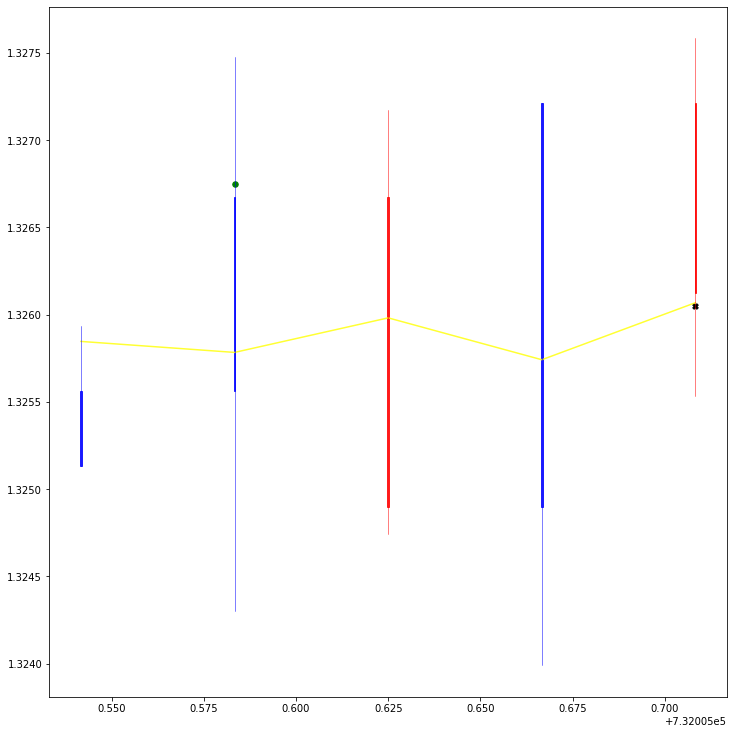

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

i = 4
x1 = data[~data['buy'].isna()].index[i]
x2 = data[~data['sell'].isna()].index[i]
ohlc = data.iloc[x1-1:x2+1]

# ohlc['ATR14'] = get_atr(ohlc)
ax.plot(ohlc['local time'], ohlc['ema1'], color='yellow', alpha=0.8)
# ax.plot(ohlc['local time'], ohlc['ema2'], color='orange', alpha=0.8)
# ax.plot(ohlc['local time'], ohlc['ema3'], color='pink', alpha=0.8)
ax.scatter(ohlc['local time'], ohlc['buy'], color='green', marker='o', s=30)
ax.scatter(ohlc['local time'], ohlc['sell'], color='black', marker='X', s=30)
# ax.scatter(ohlc['local time'], ohlc['up_fractal'], color='green', marker='^', s=30)
# ax.scatter(ohlc['local time'], ohlc['down_fractal'], color='red', marker='v', s=30)
candlestick_ohlc(ax, ohlc[['local time', 'open', 'high', 'low', 'close']].values, width=0.0005, colorup=COLORS[3],
                 colordown=COLORS[2], alpha=0.8)

# plt.axis('off')
fig.tight_layout(pad=0)

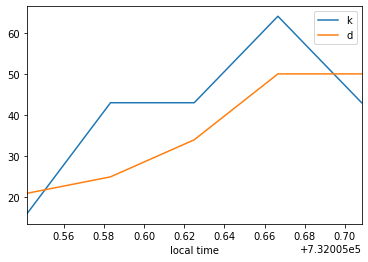

In [55]:
ohlc.plot(x='local time', y=['k', 'd'])

In [17]:
ohlc

,date,buy,open,high,low,close,ema1,ema2,ema3,sell,local time
0,2005-01-26 17:00:00,1.30811,1.307195,1.308555,1.306505,1.308035,1.303066,1.301738,1.301272,NaN,731972.708333
1,2005-01-26 18:00:00,NaN,1.308035,1.310905,1.306715,1.309825,1.304170,1.302577,1.301537,NaN,731972.750000
2,2005-01-26 19:00:00,NaN,1.309825,1.310295,1.308145,1.308485,1.305427,1.303544,1.301862,NaN,731972.791667
3,2005-01-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30698,731972.833333


In [160]:
fig.savefig('fig.jpeg')